In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

import acquire
import prepare

In [2]:
df = acquire.get_combined_csv()

In [3]:
df = prepare.prepare_sales(df)

In [4]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


In [10]:
train_size = 0.80
n = df.shape[0]
test_start = round(train_size*n)
train = df[:test_start]
test = df[test_start:]

train_size = 0.75
n = train.shape[0]
val_start = round(train_size*n)
val = train[val_start:]
train = train[:val_start]

In [11]:
train.shape, val.shape, test.shape

((547800, 16), (182600, 16), (182600, 16))

In [15]:
train.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,dayofweek,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


In [16]:
y = train[['sales_total']]

<AxesSubplot:xlabel='sale_date'>

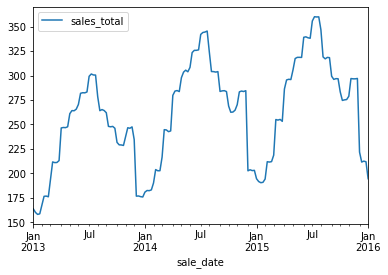

In [26]:
y.resample('W').mean().plot()

In [31]:
stack = y.groupby([y.index.year, y.index.week]).mean().unstack(0)

/var/folders/tg/htdzmdmj40vgs24scqz284xm0000gn/T/ipykernel_74582/143545285.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  stack = y.groupby([y.index.year, y.index.week]).mean().unstack(0)


In [34]:
stack.head()

sales_total                             
sale_date        2013        2014        2015 2016
sale_date                                         
1          160.535543  186.964067  206.972725  NaN
2          159.981203  182.400806  191.572366  NaN
3          157.946720  182.232537  190.391797  NaN
4          158.545383  183.021811  190.761100  NaN
5          167.585014  190.049537  194.116431  NaN

<AxesSubplot:xlabel='sale_date'>

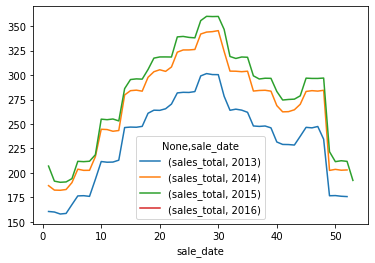

In [33]:
stack.plot()

In [35]:
y = train[['sales_total', 'store_id']]

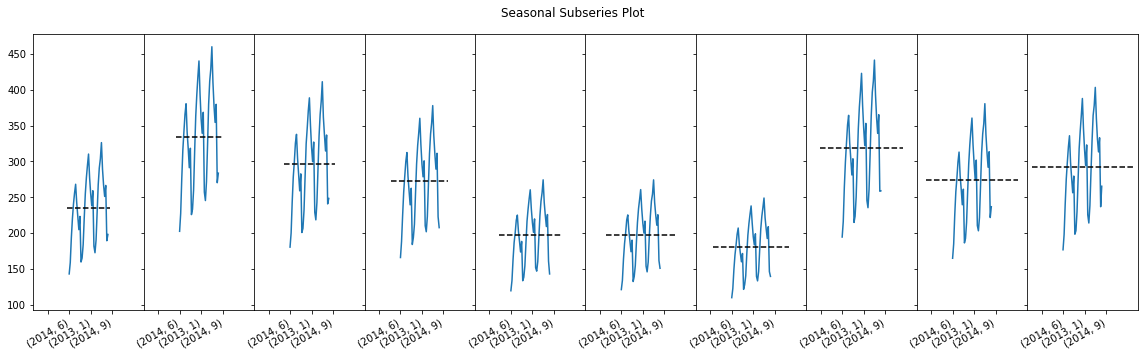

In [42]:
table = y.groupby([y.index.year, y.index.month, y.store_id]).mean().unstack()

fig, axs = plt.subplots(1, 10, sharey=True, sharex=True, figsize=(16, 5))

for ax, (store_id, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 52)'>

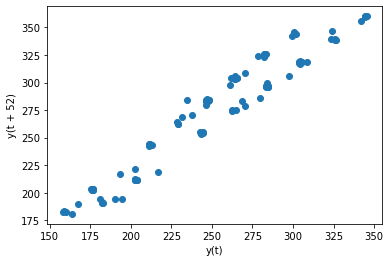

In [45]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=52)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

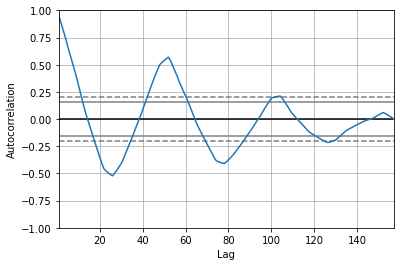

In [46]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

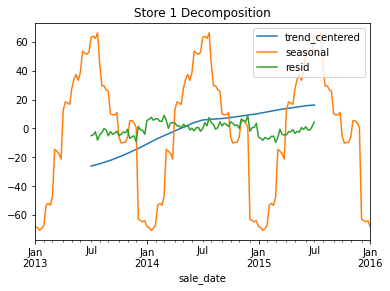

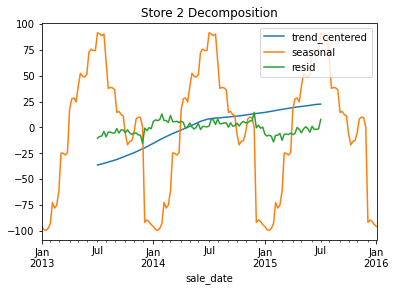

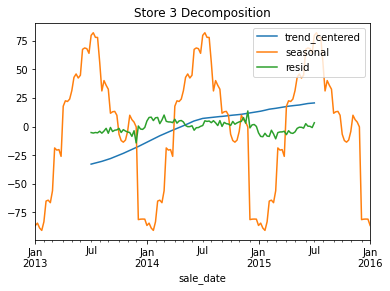

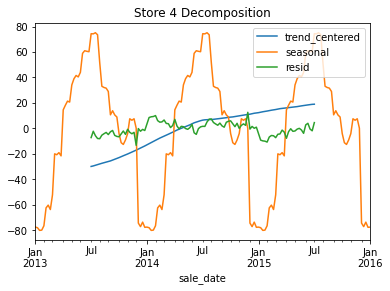

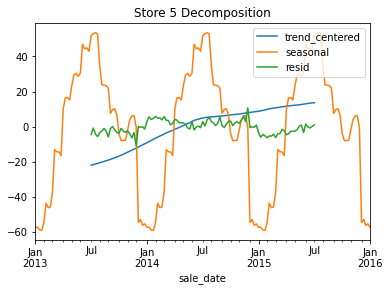

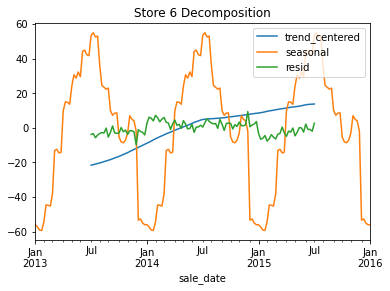

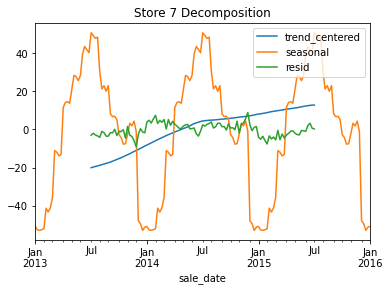

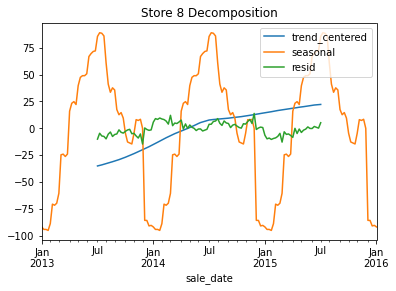

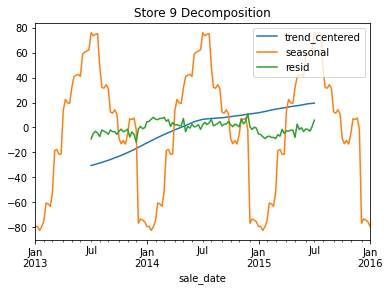

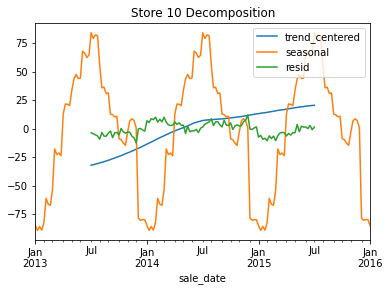

In [50]:
store = 1
while store <= train.store_id.max():
    y = train[train.store_id == store].sales_total.resample('W').mean()
    result = sm.tsa.seasonal_decompose(y)
    decomposition = pd.DataFrame({
                'y' : result.observed,
                'trend' : result.trend,
                'seasonal' : result.seasonal,
                'resid' : result.resid
    })
    decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
    decomposition[['trend_centered','seasonal','resid']].plot()
    plt.title(f'Store {store} Decomposition')
    plt.show()
    store += 1

<AxesSubplot:xlabel='sale_date'>

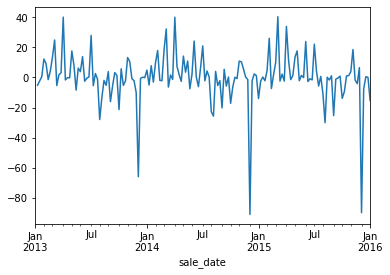

In [52]:
y.resample('W').mean().diff().plot()

[Text(0.5, 1.0, 'Sales over Time')]

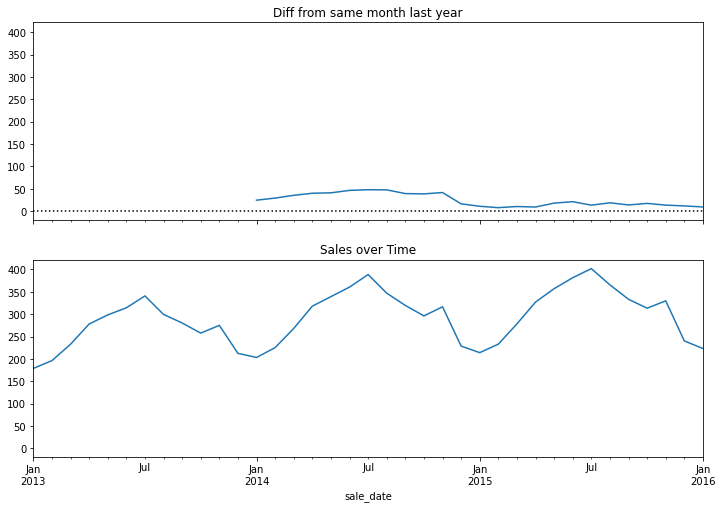

In [56]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, sharey=True, figsize=(12,8))
y.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0,*ax1.get_xlim(), color='black', ls=':')
ax1.set(title='Diff from same month last year')
y.resample('M').mean().plot(ax=ax2)
ax2.set(title='Sales over Time')